In [1]:
import numpy as np                #Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression  


In [2]:
boston = load_boston()               #importing data

D:\Sachin\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:

In [3]:
data = pd.DataFrame(boston.data)
data.head()                  #assigning the boston dataset in variable in data and importing 1st 5 colunmns

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data.isnull().sum() #checkinh null values 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [5]:
data.info()            # checking all the values and count in dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
data.describe()         #checking the description 

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features['target'] = boston.target
features.head()                                 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Assigning the data in new variable features and Importing the features_name(heading) of data .
And adding new column of target in dataset as target.

In [8]:
features.isnull().sum() #checkinh null values 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

D:\Sachin\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Sachin\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Sachin\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

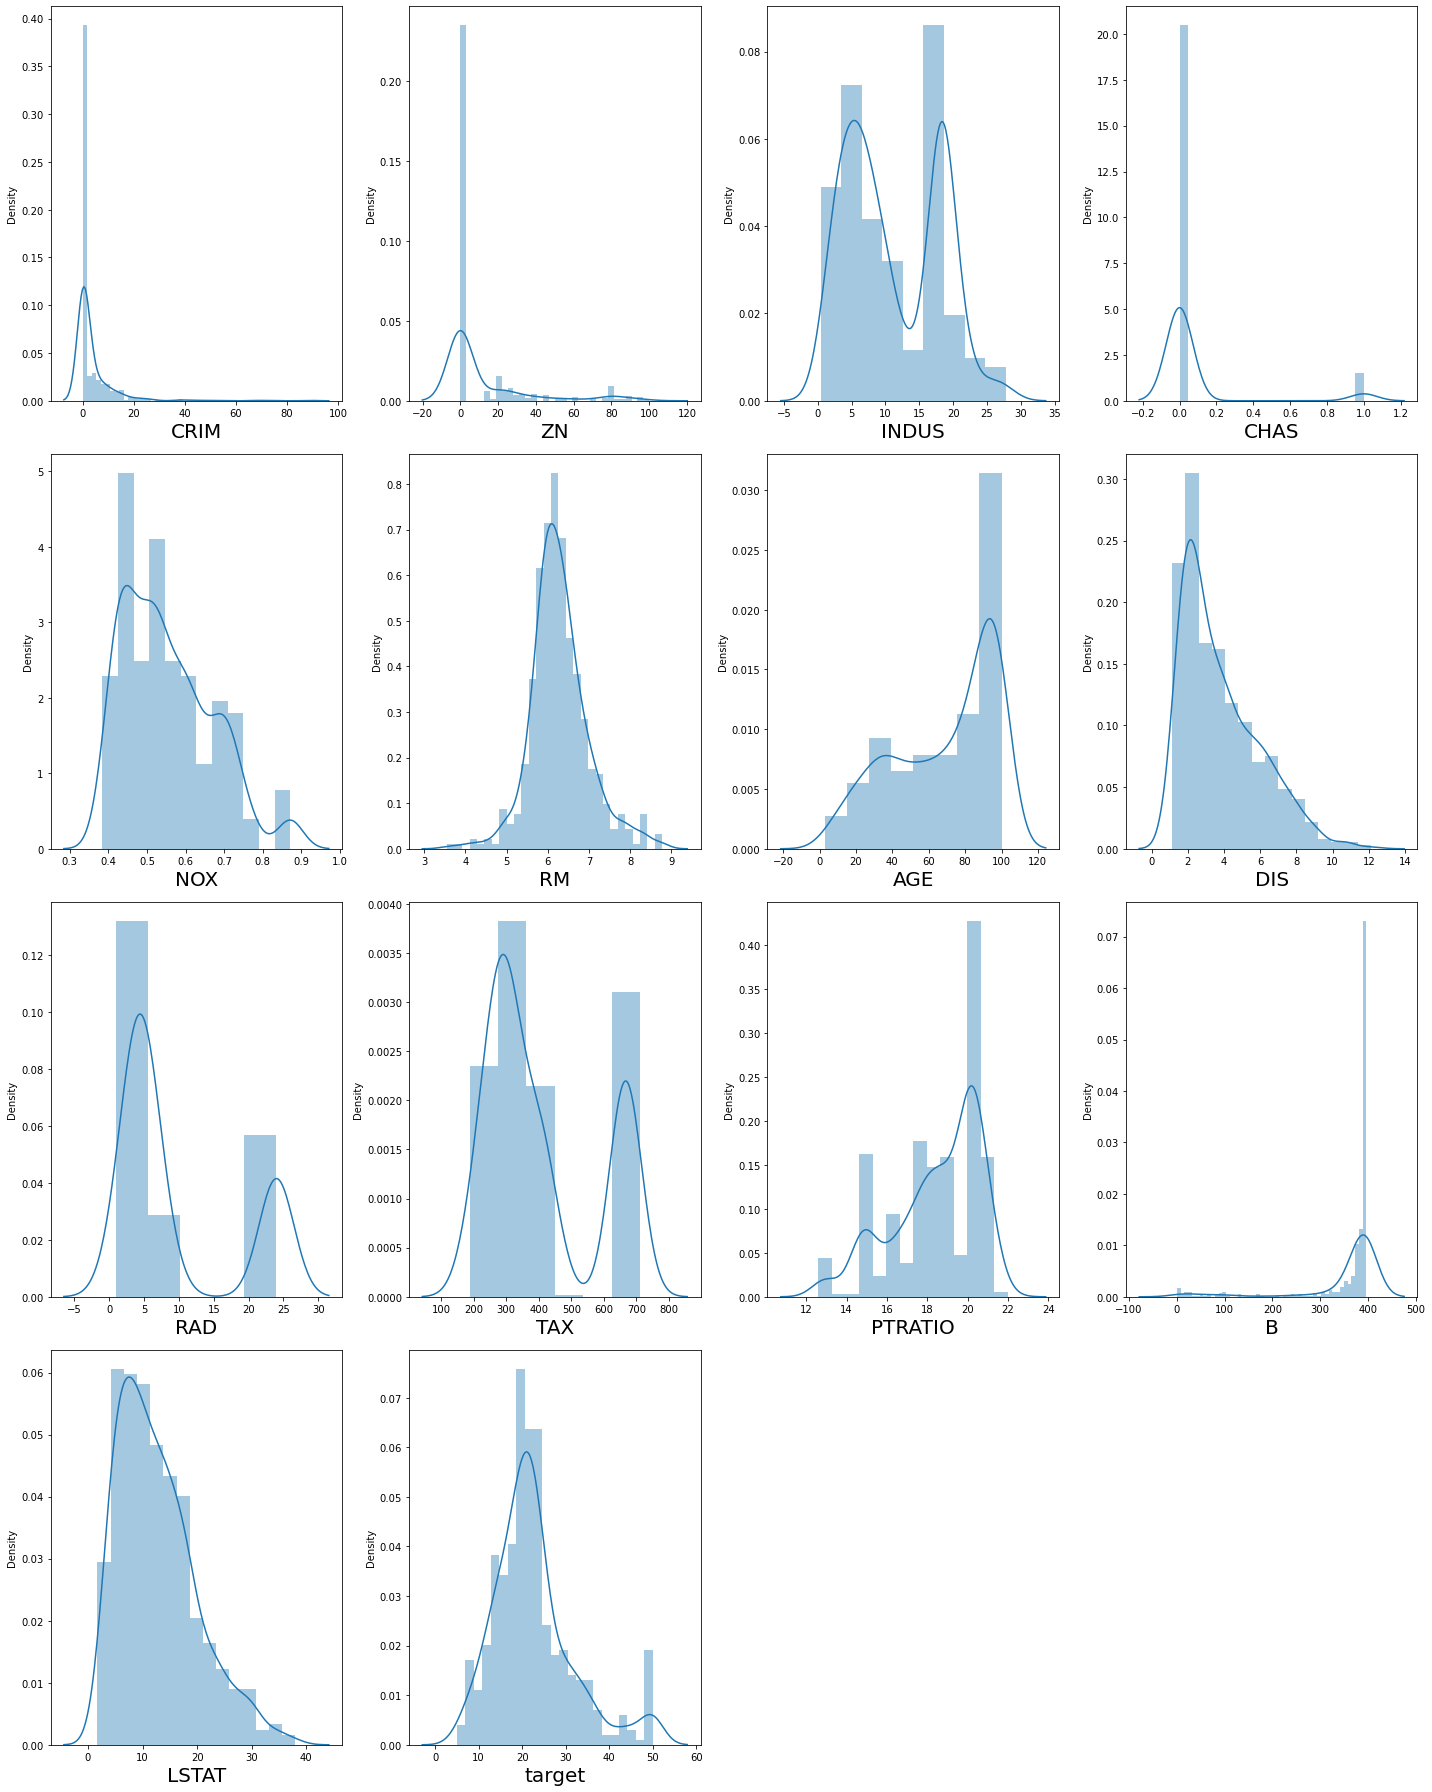

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in features:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(features[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

Plotting the graph of all columns to see the skewness in which we can see the little skewness in some data.

In [10]:
y = features['target']                    #predict / dependent variable 
X =features.drop(columns = ['target'])    #independent variables

In [11]:
scaler =StandardScaler()             #Assigning to variable Scaler
X_scaled = scaler.fit_transform(X)    #In scaler.fit_transform passing X and storing in variable X_scaled

In [12]:
X_scaled         #All X_Scaled values

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=100)

Dividing the data into training and testing with the ratio of 25:75 in which 25 will 
be testing data and 75 will be training data and the random state is 100. In this passing the x_scaled value and assigning
into the training and testing split.

In [14]:
regression = LinearRegression()          #Regression model in which training is done. (Gradient decent method)
regression.fit(x_train,y_train)

LinearRegression()

In [15]:
regression.score(x_train,y_train)   #training score

0.7421573768304615

In [16]:
regression.score(x_test,y_test)        #Testing score

0.7246154314616728

we can say by comparing training and testing output that it is good fit model

In [17]:
predy=regression.predict(x_test)          #passing x_test in regression.predict to see the predicated values.
predy

array([34.32560931, 31.2633507 , 22.28003335, 17.86975069, 20.40606949,
       25.91303352, 26.15242179, 23.66375418, 22.30169002, 19.59234366,
       26.75489062, 17.29420545, 20.80817579, 15.46781924, 41.69247941,
       20.16746428, 28.77029186, 19.02021072, 32.38988683, 40.43872985,
       35.04799251, 16.83853764, 20.33053373, 18.09797446, 13.80644424,
       12.41884725, 27.47062888, 20.40507455, 18.75428942, 20.25662126,
       15.46268828, 24.40432932, 39.15237132, 24.76295642, 31.78210045,
       28.38346572, 15.00749275, 14.45446654, 16.73702223, 23.29876692,
       22.95875889, 23.59744316, 13.77412361, 21.39735646, 31.29998733,
       26.66234266, 19.32157368, 15.87491845, 17.2294449 , 12.65256962,
       21.71569722, 20.1686083 , 23.61536492, 24.10587542, 11.97825659,
       14.74341261, 24.86442941, 34.10640748, 10.12033231, 20.89367197,
       17.54551737, 19.5997927 , 17.74536973, 30.04265302, 21.0171677 ,
       25.35489057, 15.73563341, 25.06394771, 22.10298887, 20.65

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [19]:
rmse=sqrt(mean_squared_error(y_test,predy))

In [20]:
rmse

5.2127866034438535

In [21]:
r_squared=r2_score(y_test, predy)      #passing y_test and predicated value in r2_score and assigning in variable r_squared

In [22]:
r_squared         #value of r_squared

0.7246154314616728

In [23]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1) #equation in coding format

In [24]:
adjusted_r_squared #Adjusted r_squared value

0.7173390099352537

In [25]:
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2                    #Adjusted rscore value with the help of function

In [26]:
regression.coef_    #coefficient of each column Multi linear regression without any regularizationb
                                                

array([-0.68051889,  1.06559073, -0.13132709,  0.61513632, -1.59251134,
        2.70447325, -0.37128206, -3.11845333,  2.58341035, -2.21688902,
       -1.99023689,  0.99325067, -3.23137278])

In [27]:
mean_squared_error(y_test,regression.predict(x_test)) #Value of mean squared error

27.173144173043703

In [28]:
regression.score(x_test,y_test) #Test Accurtacy (r-Square value)

0.7246154314616728

In [29]:
adj_r2(x_test,y_test,regression) #Test Accurtacy (Adjusted r-Square value)

0.6929340209218653

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-9,1e-8,1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2, 1, 5, 10, 15]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5) #r2 as final scoring method,assigning to ridge regressor
ridge_regressor.fit(X,y) #Find the slope value or coefficients
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)             #

{'alpha': 15}
0.43570206525948246


In [31]:
Ridge_alpha=0.000000000000001 #best alpha value

In [32]:
ridge_reg = Ridge(Ridge_alpha) #in ridge passing ridge alpha and assigning to variable ridge_reg
ridge_reg.fit(x_train, y_train) # 

Ridge(alpha=1e-15)

In [33]:
ridge_reg = Ridge(Ridge_alpha)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=1e-15)

In [34]:
ridge_reg.coef_   #coefficients of ridge regression

array([-0.68051889,  1.06559073, -0.13132709,  0.61513632, -1.59251134,
        2.70447325, -0.37128206, -3.11845333,  2.58341035, -2.21688902,
       -1.99023689,  0.99325067, -3.23137278])

In [35]:
r2=ridge_reg.score(x_test,y_test)
print(r2)                            #r2 value

0.7246154314616737


In [36]:
adj_r2(x_test,y_test,ridge_reg)  #adjusted r2 value

0.6929340209218662

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-9,1e-8,1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2, 1, 5, 10, 15]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

D:\Sachin\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
D:\Sachin\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
D:\Sachin\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.797e+03, tolerance: 2.814e+00
  model = cd_fast.enet_coordinat

{'alpha': 1}
0.431848787926522


In [38]:
lasso_alpha=0.000000000000001  #best fit alpha 

In [39]:
lasso_reg = Lasso(lasso_alpha)      #in lasso, passing lasso alpha value and assigning variable lasso reg
lasso_reg.fit(x_train, y_train)   #training and testing of lasso 

D:\Sachin\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.029e+02, tolerance: 3.014e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-15)

In [40]:
lasso_reg.coef_         #coefficients of lasso

array([-0.68051889,  1.06559073, -0.13132709,  0.61513632, -1.59251134,
        2.70447325, -0.37128206, -3.11845333,  2.58341035, -2.21688902,
       -1.99023689,  0.99325067, -3.23137278])

In [41]:
r2=lasso_reg.score(x_test,y_test)
print(r2)                          

0.7246154314616737


In [42]:
adj_r2(x_test,y_test,lasso_reg)

0.6929340209218662

In [43]:
from sklearn.linear_model  import  ElasticNetCV
elasticCV = ElasticNetCV(alphas = None, cv =5)
elasticCV.fit(x_train, y_train)                    

ElasticNetCV(cv=5)

In [44]:
elastic_alpha=elasticCV.alpha_
elastic_alpha                #ranomly chossing alpha value 

0.033032329354400355

In [45]:
from sklearn.linear_model  import  ElasticNet
elasticnet_reg = ElasticNet(alpha = elastic_alpha)  #in elasticnet, passing alpha value and assigning in variable elasticnet 
elasticnet_reg.fit(x_train, y_train)            #performing fit, train and test    

ElasticNet(alpha=0.033032329354400355)

In [46]:
elasticnet_reg.coef_        #coefficients of elasticnet reg.

array([-0.55879202,  0.92028443, -0.28290844,  0.64357042, -1.3645731 ,
        2.76374845, -0.34300734, -2.78900146,  1.90064639, -1.61499208,
       -1.92019528,  0.96909743, -3.16871003])

In [47]:
elasticnet_reg.score(x_test, y_test)        #r2 score value

0.7201218814878871

In [48]:
adj_r2(x_test, y_test,elasticnet_reg)        #adjusted r2 score value

0.6879235138714493

# Comparison of Coefficent

#linear regression coefficent

([ -0.68051889,  1.06559073, -0.13132709,  0.61513632, -1.59251134,2.70447325, -0.37128206, -3.11845333,     
      2.58341035,-2.21688902,-1.99023689,  0.99325067, -3.23137278])
     
#ridge regression coefficent

([ -0.68051889,  1.06559073, -0.13132709,  0.61513632, -1.59251134, 2.70447325, -0.37128206, -3.11845333,  2.58341035, 
     -2.21688902,-1.99023689,  0.99325067, -3.23137278])


#lasso regression coefficent

([ -0.68051889,  1.06559073, -0.13132709,  0.61513632, -1.59251134, 2.70447325, -0.37128206, -3.11845333,  2.58341035,
    -2.21688902,-1.99023689,  0.99325067, -3.23137278]

#elastic net regression coefficent

([-0.55879202,  0.92028443, -0.28290844,  0.64357042, -1.3645731 ,2.76374845, -0.34300734, -2.78900146,  1.90064639,
   -1.61499208,-1.92019528,  0.96909743, -3.16871003])